<a href="https://colab.research.google.com/github/rahapirzadeh/NetflixGenrePredictor/blob/main/data_mining_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Noah Ferrel, Michael Kulinich, Raha Pirzadeh


Noah Ferrel

*   Data cleaning
*   Some visualization
*   Tested different approaches to build the final model
*   Researched NLP best practices
*   Helped write final paper
*   Formatted paper in latex



Raha Pirzadeh


*   Data cleaning
*   Visulizations
*   Words2Vec analysis
*   Final paper and presentation





Michael Kulinich
- Data Cleaning and preprocessing 
- Genre Prediction section
- Built final model
- Final paper and presentation


# Introduction


# Methods

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import nltk

In [ ]:
# pre cleaned data
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.shape

(7787, 12)

## Cleaned data

In [ ]:
# preliminary cleaning of data 
# replaced null values 
print("Number of null values per column:")
print( df.isnull().sum(axis = 0))
print()
print("Number of rows before cleaning:", len(df))

# Replace all null values for director column and cast column with
# "Director of (Title)" or "Cast of (Title)" 
df.director.fillna("Director of " + df.title, inplace=True)
df.cast.fillna("Cast of " + df.title, inplace=True)

# Replace null values for country with "Other"
df['country'].replace(np.nan, "Other", inplace = True)

# There are 10 and 7 null values for "date_added" and "rating", respectively.
# Drop those null values
df.dropna(inplace=True)
print("Number of rows after cleaning:", len(df))

Number of null values per column:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Number of rows before cleaning: 7787
Number of rows after cleaning: 7770


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Director of 3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# changed format of date added and added columns of month added and year added 
df["date_added"] = pd.to_datetime(df['date_added'])
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_name_added,year_added
0,s1,TV Show,3%,Director of 3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020


In [ ]:
#split "listed in" column 
new = df["listed_in"].str.split(",", expand = True)
new.index = pd.RangeIndex(len(new.index))
print(new)
#new.head()

                           0                      1                     2
0     International TV Shows              TV Dramas   TV Sci-Fi & Fantasy
1                     Dramas   International Movies                  None
2              Horror Movies   International Movies                  None
3         Action & Adventure     Independent Movies      Sci-Fi & Fantasy
4                     Dramas                   None                  None
...                      ...                    ...                   ...
7765                  Dramas   International Movies                  None
7766                  Dramas   International Movies      Music & Musicals
7767           Documentaries   International Movies      Music & Musicals
7768  International TV Shows             Reality TV                  None
7769           Documentaries       Music & Musicals                  None

[7770 rows x 3 columns]


In [ ]:
# created list of all genres
all_ = []

for i in range(new.shape[1]):
  for j in range(new.shape[0]):
    if new[i][j] != None:
      all_.append(new[i][j].strip())

all_uni = set(all_)

print(all_uni)
print(len(all_uni))

{'Cult Movies', 'Stand-Up Comedy & Talk Shows', 'Action & Adventure', 'Thrillers', 'Horror Movies', 'International TV Shows', 'TV Sci-Fi & Fantasy', 'LGBTQ Movies', 'Romantic Movies', 'TV Comedies', 'Stand-Up Comedy', 'Korean TV Shows', 'Documentaries', 'Music & Musicals', 'Comedies', 'Movies', 'TV Shows', 'Dramas', 'Reality TV', 'Classic Movies', 'Crime TV Shows', 'British TV Shows', 'TV Action & Adventure', 'Anime Series', 'Spanish-Language TV Shows', "Kids' TV", 'International Movies', 'Sci-Fi & Fantasy', 'Anime Features', 'Science & Nature TV', 'TV Mysteries', 'Children & Family Movies', 'Classic & Cult TV', 'Docuseries', 'TV Horror', 'Faith & Spirituality', 'Independent Movies', 'Romantic TV Shows', 'Teen TV Shows', 'Sports Movies', 'TV Dramas', 'TV Thrillers'}
42


In [ ]:
#function to count the genre each tv show/movie falls under
def to_bi_cols(all_uni,df,print_ = False):
  list_dict_c = []

  for x in all_uni:
    temp2 = []
    if print_ == True:
      print(x)
    for i in range(df.shape[1]):
      temp = []
      for j in range(df.shape[0]):
        if df[i][j] == None:
          temp.append(0)
        elif str(x) == str(df[i][j]).strip():
          temp.append(1)
        else:
          temp.append(0)
      temp2.append(temp)
    temp_df = pd.DataFrame(temp2).sum()
    list_dict_c.append((x,temp_df))
    if print_ == True:
      print('count: ',sum(temp_df))

  list_dict_c = dict(list_dict_c)

  final_df = pd.DataFrame(list_dict_c)

  return final_df

In [ ]:
#dataframe of genre count
new_genre_final = to_bi_cols(all_uni,new)
#print(new_genre_final)
new_genre_final.head()

,Cult Movies,Stand-Up Comedy & Talk Shows,Action & Adventure,Thrillers,Horror Movies,International TV Shows,TV Sci-Fi & Fantasy,LGBTQ Movies,Romantic Movies,TV Comedies,Stand-Up Comedy,Korean TV Shows,Documentaries,Music & Musicals,Comedies,Movies,TV Shows,Dramas,Reality TV,Classic Movies,Crime TV Shows,British TV Shows,TV Action & Adventure,Anime Series,Spanish-Language TV Shows,Kids' TV,International Movies,Sci-Fi & Fantasy,Anime Features,Science & Nature TV,TV Mysteries,Children & Family Movies,Classic & Cult TV,Docuseries,TV Horror,Faith & Spirituality,Independent Movies,Romantic TV Shows,Teen TV Shows,Sports Movies,TV Dramas,TV Thrillers
0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#total count of show/movie in each genre 
genre=new_genre_final.sum().sort_values(ascending=False)
print(genre)

International Movies            2437
Dramas                          2105
Comedies                        1471
International TV Shows          1197
Documentaries                    786
Action & Adventure               721
TV Dramas                        703
Independent Movies               673
Children & Family Movies         532
Romantic Movies                  531
TV Comedies                      517
Thrillers                        491
Crime TV Shows                   426
Kids' TV                         411
Docuseries                       352
Romantic TV Shows                333
Stand-Up Comedy                  329
Music & Musicals                 321
Horror Movies                    312
British TV Shows                 231
Reality TV                       222
Sci-Fi & Fantasy                 218
Sports Movies                    196
Korean TV Shows                  150
TV Action & Adventure            149
Anime Series                     146
Spanish-Language TV Shows        146
C

In [ ]:
#Convert categorical tv show/movie variable into binary 
type_encoded = pd.get_dummies(df.type, prefix='type')
print(type_encoded.head())

   type_Movie  type_TV Show
0           0             1
1           1             0
2           1             0
3           1             0
4           1             0


In [ ]:
#print rating column
Rate = set(df.rating)
print(Rate)

{'UR', 'TV-Y7', 'TV-G', 'G', 'PG', 'TV-PG', 'NC-17', 'TV-Y', 'PG-13', 'TV-MA', 'NR', 'TV-14', 'R', 'TV-Y7-FV'}


In [ ]:
# group the ratings into 3 main groups
Mature = ['NC-17','R', 'NR', 'UR','TV-MA']
PG = ['TV-PG', 'PG-13','TV-14', 'PG']
kids = ['TV-G', 'TV-Y7-FV', 'TV-Y7', 'TV-Y', 'G']

In [ ]:
#change rating column to one of the 3 main groups 
new_ratings = []

for x in df.rating:
  if x in Mature:
    new_ratings.append('Mature')
  elif x in PG:
    new_ratings.append('PG')
  elif x in kids:
    new_ratings.append('kids')

new_ratings = pd.DataFrame(new_ratings)
new_ratings.columns = ['rating']
#print(new_ratings)
new_ratings.head(10)

,rating
0,Mature
1,Mature
2,Mature
3,PG
4,PG
5,Mature
6,Mature
7,Mature
8,PG
9,Mature


In [ ]:
rating_factor = pd.factorize(new_ratings['rating'])[0]

rating_factor = pd.DataFrame(rating_factor)
rating_factor.columns = ['ratings_fact']
print(rating_factor)
#rating_factor.head()

      ratings_fact
0                0
1                0
2                0
3                1
4                1
...            ...
7765             0
7766             1
7767             0
7768             1
7769             0

[7770 rows x 1 columns]


In [ ]:
#Convert categorical rating variables into binary 
rating_encoded = pd.get_dummies(new_ratings.rating, prefix='Rating')
print(rating_encoded.head())

   Rating_Mature  Rating_PG  Rating_kids
0              1          0            0
1              1          0            0
2              1          0            0
3              0          1            0
4              0          1            0


In [ ]:
# split country column of rows with multiple entries
new_counties = df["country"].str.split(",", expand = True)
new_counties.index = pd.RangeIndex(len(new_counties.index))
print(new_counties)

                  0                1                2   ...    9     10    11
0             Brazil             None             None  ...  None  None  None
1             Mexico             None             None  ...  None  None  None
2          Singapore             None             None  ...  None  None  None
3      United States             None             None  ...  None  None  None
4      United States             None             None  ...  None  None  None
...              ...              ...              ...  ...   ...   ...   ...
7765          Sweden   Czech Republic   United Kingdom  ...  None  None  None
7766           India             None             None  ...  None  None  None
7767           Other             None             None  ...  None  None  None
7768       Australia             None             None  ...  None  None  None
7769  United Kingdom           Canada    United States  ...  None  None  None

[7770 rows x 12 columns]


In [ ]:
#create list of all countries 
all_countr = []

for i in range(new_counties.shape[1]):
  for j in range(new_counties.shape[0]):
    if new_counties[i][j] != None:
      all_countr.append(new_counties[i][j].strip())

all_countr_uni = set(all_countr)

all_countr_uni.remove('')

print(all_countr_uni)
print(len(all_countr_uni))

{'Malaysia', 'Colombia', 'South Africa', 'Uganda', 'Turkey', 'Belarus', 'Greece', 'Czech Republic', 'Jordan', 'United Arab Emirates', 'Afghanistan', 'Brazil', 'Lithuania', 'Peru', 'Denmark', 'Morocco', 'Slovakia', 'Italy', 'Saudi Arabia', 'Montenegro', 'Mexico', 'Netherlands', 'Dominican Republic', 'Liechtenstein', 'Pakistan', 'Cyprus', 'Iraq', 'Poland', 'Ghana', 'Cambodia', 'Indonesia', 'Lebanon', 'Spain', 'Zimbabwe', 'Algeria', 'Georgia', 'Malta', 'Sweden', 'Bulgaria', 'Kuwait', 'Luxembourg', 'Hong Kong', 'Austria', 'East Germany', 'Syria', 'Ireland', 'Albania', 'Iran', 'Portugal', 'New Zealand', 'Japan', 'Other', 'Iceland', 'Bahamas', 'Qatar', 'Cuba', 'Azerbaijan', 'Malawi', 'Angola', 'Botswana', 'Hungary', 'Switzerland', 'Bangladesh', 'Croatia', 'Israel', 'Samoa', 'Thailand', 'Guatemala', 'Egypt', 'Germany', 'Venezuela', 'Paraguay', 'Canada', 'United Kingdom', 'France', 'Uruguay', 'Armenia', 'Puerto Rico', 'Kenya', 'Namibia', 'Norway', 'Romania', 'Vietnam', 'Bermuda', 'Mongolia', '

In [ ]:
new_country_final = to_bi_cols(all_countr_uni,new_counties)
#print(new_country_final)
new_country_final.head()

,Malaysia,Colombia,South Africa,Uganda,Turkey,Belarus,Greece,Czech Republic,Jordan,United Arab Emirates,Afghanistan,Brazil,Lithuania,Peru,Denmark,Morocco,Slovakia,Italy,Saudi Arabia,Montenegro,Mexico,Netherlands,Dominican Republic,Liechtenstein,Pakistan,Cyprus,Iraq,Poland,Ghana,Cambodia,Indonesia,Lebanon,Spain,Zimbabwe,Algeria,Georgia,Malta,Sweden,Bulgaria,Kuwait,...,Kenya,Namibia,Norway,Romania,Vietnam,Bermuda,Mongolia,Argentina,China,West Germany,Mauritius,South Korea,Soviet Union,Sudan,Slovenia,Kazakhstan,Australia,Sri Lanka,Cayman Islands,Chile,Jamaica,Somalia,Senegal,Nicaragua,Russia,Nigeria,India,Taiwan,Latvia,Philippines,Belgium,Ecuador,United States,Finland,Panama,Singapore,Serbia,Ukraine,Vatican City,Nepal
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
#sum of countries
new_country_final.sum()

Malaysia         26
Colombia         45
South Africa     54
Uganda            1
Turkey          108
               ... 
Singapore        39
Serbia            7
Ukraine           3
Vatican City      1
Nepal             2
Length: 118, dtype: int64

In [ ]:
new_country_final['Germany'].sum()

199

In [ ]:
print("MAX: ",max(new_country_final.sum()))
print("Min: ",min(new_country_final.sum()))
print("Mean: ",np.mean(new_country_final.sum()))
print("Median: ",np.median(new_country_final.sum()))
print('\n')
print("Amount over mean", sum(new_country_final.sum()>81))
print("Amount under mean", sum(new_country_final.sum()<81))
print('\n')
print("Amount over median", sum(new_country_final.sum()>7))
print("Amount under median", sum(new_country_final.sum()<7))

MAX:  3288
Min:  1
Mean:  80.95762711864407
Median:  6.5


Amount over mean 21
Amount under mean 97


Amount over median 56
Amount under median 59


In [ ]:
# create 'others' category in countries list for countries with less than 81 movies/tv shows
others = (new_country_final.sum()<447) #81.      447 to have 4 groups
others_keep = (new_country_final.sum()>447) #81

others.reset_index(drop=True, inplace=True)
others_keep.reset_index(drop=True, inplace=True)

temp5 = new_country_final.columns[others]
temp6 = new_country_final.columns[others_keep]

merge_contries = new_country_final[temp5]
countries_keep = new_country_final[temp6]

others_ = new_country_final['Other'] + merge_contries.sum(axis=1)

others_final = others_.apply(lambda x: (x>=1)*1)

print('Final Other: ')
print(others_final)
print(sum(others_final))

countries_keep.loc[:,'Other'] = others_final

print("Final")
print(countries_keep)
print(countries_keep.sum())

Final Other: 
0       1
1       1
2       1
3       0
4       0
       ..
7765    1
7766    0
7767    1
7768    1
7769    1
Length: 7770, dtype: int64
3779
Final
      Other  United Kingdom  India  United States
0         1               0      0              0
1         1               0      0              0
2         1               0      0              0
3         0               0      0              1
4         0               0      0              1
...     ...             ...    ...            ...
7765      1               1      0              0
7766      0               0      1              0
7767      1               0      0              0
7768      1               0      0              0
7769      1               1      0              1

[7770 rows x 4 columns]
Other             3779
United Kingdom     722
India              990
United States     3288
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# add new dataframes to original dataframe
df.reset_index(drop=True, inplace=True)
countries_keep.reset_index(drop=True, inplace=True)
rating_encoded.reset_index(drop=True, inplace=True)
type_encoded.reset_index(drop=True, inplace=True)
new_genre_final.reset_index(drop=True, inplace=True)

final_df_list = [df,countries_keep,rating_encoded,type_encoded,new_genre_final,rating_factor]

final_df = pd.concat(final_df_list,axis=1)

In [ ]:
for x in final_df_list:
  print(x)

     show_id     type  ... month_name_added year_added
0         s1  TV Show  ...           August       2020
1         s2    Movie  ...         December       2016
2         s3    Movie  ...         December       2018
3         s4    Movie  ...         November       2017
4         s5    Movie  ...          January       2020
...      ...      ...  ...              ...        ...
7765   s7783    Movie  ...          October       2020
7766   s7784    Movie  ...            March       2019
7767   s7785    Movie  ...        September       2020
7768   s7786  TV Show  ...          October       2020
7769   s7787    Movie  ...            March       2020

[7770 rows x 14 columns]
      Other  United Kingdom  India  United States
0         1               0      0              0
1         1               0      0              0
2         1               0      0              0
3         0               0      0              1
4         0               0      0              1
...     ...   

### Final Dataframe

In [ ]:
#cleaned dataframe with all the added columns
#print(final_df)
final_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_name_added,year_added,Other,United Kingdom,India,United States,Rating_Mature,Rating_PG,Rating_kids,type_Movie,type_TV Show,Cult Movies,Stand-Up Comedy & Talk Shows,Action & Adventure,Thrillers,Horror Movies,International TV Shows,TV Sci-Fi & Fantasy,LGBTQ Movies,Romantic Movies,TV Comedies,Stand-Up Comedy,Korean TV Shows,Documentaries,Music & Musicals,Comedies,Movies,TV Shows,Dramas,Reality TV,Classic Movies,Crime TV Shows,British TV Shows,TV Action & Adventure,Anime Series,Spanish-Language TV Shows,Kids' TV,International Movies,Sci-Fi & Fantasy,Anime Features,Science & Nature TV,TV Mysteries,Children & Family Movies,Classic & Cult TV,Docuseries,TV Horror,Faith & Spirituality,Independent Movies,Romantic TV Shows,Teen TV Shows,Sports Movies,TV Dramas,TV Thrillers,ratings_fact
0,s1,TV Show,3%,Director of 3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
final_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_name_added', 'year_added', 'United States', 'India', 'Other',
       'United Kingdom', 'Rating_Mature', 'Rating_PG', 'Rating_kids',
       'type_Movie', 'type_TV Show', 'TV Comedies', 'Classic & Cult TV',
       'TV Dramas', 'British TV Shows', 'Sports Movies',
       'Stand-Up Comedy & Talk Shows', 'TV Horror', 'Horror Movies',
       'Romantic TV Shows', 'Anime Features', 'TV Sci-Fi & Fantasy',
       'TV Thrillers', 'Faith & Spirituality', 'International Movies',
       'TV Action & Adventure', 'Science & Nature TV', 'Sci-Fi & Fantasy',
       'Romantic Movies', 'Dramas', 'Comedies', 'LGBTQ Movies', 'Kids' TV',
       'Children & Family Movies', 'Classic Movies', 'Teen TV Shows',
       'TV Shows', 'Anime Series', 'Korean TV Shows', 'Music & Musicals',
       'Movies', 'Crime TV Shows', 'Spanish-Language TV Shows',
   

In [ ]:
remove_var = ['show_id','type','title','director','cast','country','date_added',
              'rating', 'duration', 'listed_in', 'description','month_name_added',
       'type_TV Show','Rating_Mature', 'Rating_PG', 'Rating_kids']

model_df = final_df.drop(remove_var, axis=1)

model_df.columns

Index(['release_year', 'year_added', 'United States', 'India', 'Other',
       'United Kingdom', 'type_Movie', 'TV Comedies', 'Classic & Cult TV',
       'TV Dramas', 'British TV Shows', 'Sports Movies',
       'Stand-Up Comedy & Talk Shows', 'TV Horror', 'Horror Movies',
       'Romantic TV Shows', 'Anime Features', 'TV Sci-Fi & Fantasy',
       'TV Thrillers', 'Faith & Spirituality', 'International Movies',
       'TV Action & Adventure', 'Science & Nature TV', 'Sci-Fi & Fantasy',
       'Romantic Movies', 'Dramas', 'Comedies', 'LGBTQ Movies', 'Kids' TV',
       'Children & Family Movies', 'Classic Movies', 'Teen TV Shows',
       'TV Shows', 'Anime Series', 'Korean TV Shows', 'Music & Musicals',
       'Movies', 'Crime TV Shows', 'Spanish-Language TV Shows',
       'Independent Movies', 'Cult Movies', 'Action & Adventure', 'Docuseries',
       'Thrillers', 'TV Mysteries', 'International TV Shows', 'Reality TV',
       'Stand-Up Comedy', 'Documentaries', 'ratings_fact'],
      dtype=

In [ ]:
# dataframe with added data 
model_df.head()

,release_year,year_added,United States,India,Other,United Kingdom,type_Movie,TV Comedies,Classic & Cult TV,TV Dramas,British TV Shows,Sports Movies,Stand-Up Comedy & Talk Shows,TV Horror,Horror Movies,Romantic TV Shows,Anime Features,TV Sci-Fi & Fantasy,TV Thrillers,Faith & Spirituality,International Movies,TV Action & Adventure,Science & Nature TV,Sci-Fi & Fantasy,Romantic Movies,Dramas,Comedies,LGBTQ Movies,Kids' TV,Children & Family Movies,Classic Movies,Teen TV Shows,TV Shows,Anime Series,Korean TV Shows,Music & Musicals,Movies,Crime TV Shows,Spanish-Language TV Shows,Independent Movies,Cult Movies,Action & Adventure,Docuseries,Thrillers,TV Mysteries,International TV Shows,Reality TV,Stand-Up Comedy,Documentaries,ratings_fact
0,2020,2020,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2016,2016,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,2018,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2009,2017,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,2008,2020,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
model_df.ratings_fact.value_counts()

0    3617
1    3365
2     788
Name: ratings_fact, dtype: int64

Text(0.5, 1.0, 'Proportion of content ratings')

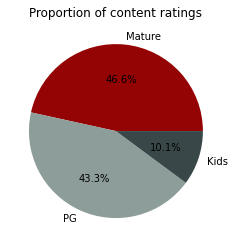

In [ ]:
plt.pie(model_df.ratings_fact.value_counts(),labels=["Mature", "PG",'Kids'],autopct='%1.1f%%',colors=('#940404','#8d9d9a','#394749'))
plt.title('Proportion of content ratings')

## Classifiers

In [ ]:
from sklearn.feature_selection import RFE
import math

In [ ]:
# Random forest on movies
X = model_df.drop(['type_Movie'],axis=1)
y = model_df['type_Movie']
  
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
myForest = RandomForestClassifier(random_state=0,n_estimators=4)
For_model = myForest.fit(X_train,y_train)
fpr, tpr, thresholds = metrics.roc_curve(y_test, For_model.predict_proba(X_test)[:,1])#, pos_label=2)
print('Test AUC: ',metrics.auc(fpr, tpr))
print('Test Acurracy: ', For_model.score(X_test,y_test))

Test AUC:  1.0
Test Acurracy:  1.0


In [ ]:
# Random forest on movie/tv rating (mature, pg, kids)
X = model_df.drop(['ratings_fact'],axis=1)
y = model_df['ratings_fact']
  
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

myForest = RandomForestClassifier(random_state=0,n_estimators=1000)
For_model = myForest.fit(X_train,y_train)
#fpr, tpr, thresholds = metrics.roc_curve(y_test, For_model.predict_proba(X_test)[:,1])#, pos_label=2)
#print('Test AUC: ',metrics.auc(fpr, tpr))
print('Test Acurracy: ', For_model.score(X_test,y_test))

Test Acurracy:  0.6721564590838909


In [ ]:
# Multinomial Logistic Regression

clf = LogisticRegression(random_state=0,max_iter=10000).fit(X, y)

print(clf.score(X_test,y_test))

0.6803911477097272


In [ ]:
exp_coed_0 = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(clf.coef_[0])],axis=1)
exp_coed_1 = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(clf.coef_[1])],axis=1)
exp_coed_2 = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(clf.coef_[2])],axis=1)

exp_coed_0.columns = ['Column','Effectsize']
exp_coed_1.columns = ['Column','Effectsize']
exp_coed_2.columns = ['Column','Effectsize']

exp_0 = np.exp(exp_coed_0.Effectsize)
exp_1 = np.exp(exp_coed_1.Effectsize)
exp_2 = np.exp(exp_coed_2.Effectsize)

exp_coed_0 = pd.concat([exp_coed_0,pd.DataFrame(exp_0)],axis=1)
exp_coed_1 = pd.concat([exp_coed_1,pd.DataFrame(exp_1)],axis=1)
exp_coed_2 = pd.concat([exp_coed_2,pd.DataFrame(exp_2)],axis=1)

exp_coed_0.columns = ['Column','Effectsize', 'exp_effectsize']
exp_coed_1.columns = ['Column','Effectsize', 'exp_effectsize']
exp_coed_2.columns = ['Column','Effectsize', 'exp_effectsize']

In [ ]:
print(exp_coed_1)
print(exp_coed_2)
print(exp_coed_0)

                          Column  Effectsize  exp_effectsize
0                   release_year   -0.022075        0.978166
1                     year_added    0.022190        1.022438
2                          Other    0.131260        1.140264
3                  United States    0.328492        1.388873
4                 United Kingdom    0.042085        1.042983
5                          India    0.760541        2.139434
6                     type_Movie   -0.224421        0.798979
7         International TV Shows    0.442020        1.555847
8                      Thrillers    0.072936        1.075662
9                      TV Dramas    0.562423        1.754919
10               Korean TV Shows    0.154508        1.167083
11          Faith & Spirituality    0.883795        2.420066
12  Stand-Up Comedy & Talk Shows   -0.227645        0.796407
13                    Reality TV    0.283815        1.328187
14                Classic Movies   -0.622084        0.536825
15          Internationa

In [ ]:
estimator = LogisticRegression(random_state=0,max_iter=10000)
selector = RFE(estimator, n_features_to_select=15, step=1)

In [ ]:
selec_model = selector.fit(X, y)

In [ ]:
selec_model.score(X_test,y_test)

0.6206896551724138

From the random forest classifiers above, we have a good indicator of the importance the classifier assigns to movie type and rating group. The accurracy for both variables is relatively high. 

# Merge Netflix with IMDB

This section was not used because we would have lost half of the data when merging the two datasets


In [ ]:
IMDB_movies = pd.read_csv('IMDb movies.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
net_movie = final_df[final_df['type'] == 'Movie']

In [ ]:
len(net_movie)

5372

In [ ]:
IMDB_movies.head()

In [ ]:
same = (IMDB_movies.title == IMDB_movies.original_title)

all(same)

In [ ]:
IMDB_title = set(IMDB_movies.title)
IMDB_o_title = set(IMDB_movies.original_title)
print(IMDB_title)
Netflix_title = set(net_movie.title)
print(Netflix_title)

{'Dangerous Moonlight', 'Moj ata, socialisticni kulak', 'Always Will', 'Yutham Sei', 'Hængbok', 'Party fatale', 'Marshall: un cane per amico', 'Noi credevamo', 'Luis e gli Alieni', 'Kamerdyner', 'Masters', 'Artistka', 'For Ellen', 'Our Burden Is Light', 'Dance Charlie Dance', 'Quattro donne disposte a tutto', "L'artiglio giallo", 'Ghost Writer', 'Il regno del terrore', 'La leggenda del cavallo bianco', 'I kyria dimarhos', 'Polskie gówno', 'Helena from the Wedding', 'Summer of Sam - Panico a New York', 'Lionheart', 'Posizioni compromettenti', 'Popieluszko - Non si può uccidere la speranza', 'Kadhal Sadugudu', 'Cosmos', 'Kareeb', 'Bane', 'The Hunting Party - I cacciatori', 'El robo más grande jamás contado', 'Beverly Hood', 'Lo scorpione nero', 'Autumn Born', 'Song of the Dead', 'Dog Days of Summer', 'Khuda Kay Liye', 'Le amanti di Jesse il bandito', 'Noite Escura', 'Executions', "Elvis Gratton 3: Le retour d'Elvis Wong", 'Faithful in My Fashion', 'Ne Bom Vec Luzerka', 'It Started as a J

In [ ]:
print(len(Netflix_title))
print(len(IMDB_title))

In [ ]:
test = IMDB_title.intersection(Netflix_title)
test2 = (IMDB_title^Netflix_title)&Netflix_title
print(len(test))
print(len(test2))
print(len(Netflix_title)+len(IMDB_title))

1985
3387
87466


In [ ]:
test3 = IMDB_o_title.intersection(Netflix_title)
test4 = (IMDB_o_title^Netflix_title)&Netflix_title
print(len(test3))
print(len(test4))
print(len(Netflix_title)+len(IMDB_o_title))

2623
2749
86224


In [ ]:
test9 = set.union(test,test3)

In [ ]:
print(len(IMDB_title.intersection(IMDB_o_title)))

In [ ]:
len(test3.intersection(test))+len(test3^test)

2665

In [ ]:
(set(IMDB_movies.title) ^ set(IMDB_movies.original_title)) & set(IMDB_movies.original_title)

In [ ]:
test5 = set.union(test2,test4)

In [ ]:
test5

In [ ]:
temp = []

for x in test5:
  temp.append(final_df[final_df.title == x])


test7 = pd.concat(temp,axis=0)

In [ ]:
temp = []

for x in test5:
  temp.append(IMDB_movies[IMDB_movies.title == x])


test8 = pd.concat(temp,axis=0)

In [ ]:
len(test8)

43

In [ ]:
print(len(test7))
print(len(test5))
print(len(set(test7.title)))


3429
3429
3429


# Data Visualization

In [ ]:
# Movies dataframe
movies = df[df['type'] == 'Movie']
movies['duration'] = movies['duration'].apply(lambda x: x.split()[0])
movies['duration'] = pd.to_numeric(movies['duration'])
#movies.head()

In [ ]:
# TV shows dataframe
tv = df[df['type'] == 'TV Show']
#tv.head()

In [ ]:
# Total number of movies and tv shows
content_tv=list(df['type']).count('TV Show')
print("TV show count:" ,content_tv)

content_mov=list(df['type']).count('Movie')
print("Movie count:" ,content_mov)

TV show count: 2398
Movie count: 5372


Text(0.5, 1.0, 'Proportion of Movies to TV Shows on Netflix')

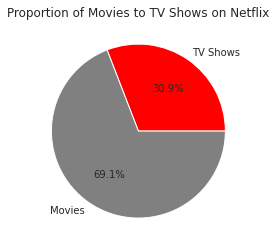

In [ ]:
# pie chart showing data distribution of movies and tv shows 
plt.pie([content_tv,content_mov],labels=["TV Shows", "Movies"],autopct='%1.1f%%',colors=('red','gray'))
plt.title('Proportion of Movies to TV Shows on Netflix')

Text(0.5, 1.0, 'Top 15 Countries that Produce the Most Content')

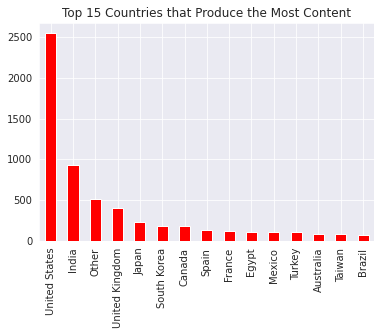

In [ ]:
# Top 15 countries with most content (Movies+TV)
sns.set_style("darkgrid")
top_countries = (final_df['country'].value_counts())[:15]
top_countries.plot(kind='bar', color='red')
plt.title('Top 15 Countries that Produce the Most Content')

Bar chart of the top 15 countries with the count of movies/tv shows produced. 

Text(0.5, 1.0, 'Years with most Released Content')

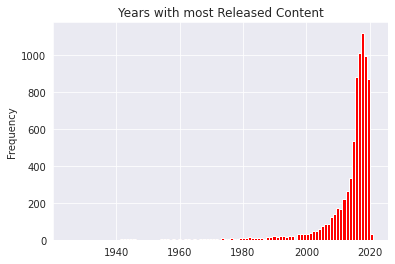

In [ ]:
# Years with most released content (Movies+TV)
sns.set_style("darkgrid")
final_df['release_year'].plot(kind='hist',bins=100, color='red')
plt.title('Years with most Released Content')

Histogram of the years with the most realsed content. 

Text(0, 0.5, 'Duration in minutes')

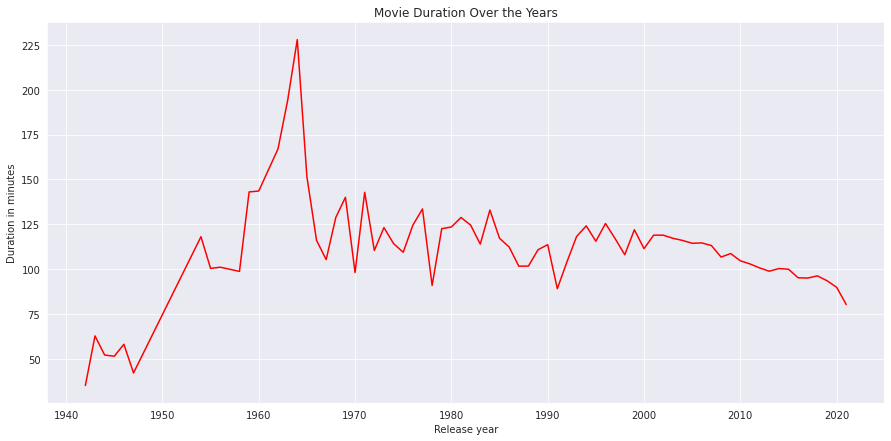

In [ ]:
# Movie duration 
fig, ax = plt.subplots(figsize=(15,7))
movies.groupby(['release_year']).mean()['duration'].plot(ax=ax,color = 'red')
plt.title('Movie Duration Over the Years')
plt.xlabel('Release year')
plt.ylabel('Duration in minutes')

Plot to show the movie duration over the years. 

We decided to include these plots after we cleaned and added columns to our datset. These plots gave us a great insight in the trends and data we are working with. When we start the classification models, the visualizations will be useful. 

Our data needed to be restructured to be easier to use when doing the various classifiaction models. We also doo into consideration the columns with multiple entries and how that would affect out models later on, so we decided to clean that early on. 

Text(0.5, 1.0, 'Top 10 Genres')

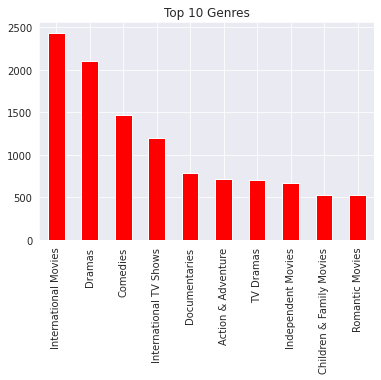

In [ ]:
#bar plot with top 10 genres
sns.set_style("darkgrid")
genre[:10].plot(kind='bar', color='red')
plt.title('Top 10 Genres')


# Genre Prediction

### README
For this portion of the notebook, you need to upload the glove word embeddings. This can take a couple of minutes. Also training the model will take some time as well
- In order to use the GloVe word embeddings, download the 'glove.6B.zip' file from [here](https://nlp.stanford.edu/projects/glove/) then extract it and upload the 'glove.6B.50d' file to the google collab at the begining of the Genre Prediction section.


In [ ]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import concatenate, Input, Dense, Flatten, Dropout, AveragePooling1D, MaxPooling1D, Conv1D, Embedding, LSTM, GlobalAveragePooling1D, GlobalMaxPooling1D, SpatialDropout1D, Bidirectional, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from numpy import array
from numpy import asarray
from numpy import zeros
from sklearn.metrics import hamming_loss
from google.colab import drive
from google.colab import files
from tensorflow.keras.utils import plot_model
import pydot


In [ ]:
# chose 'glove.6B.50d' from wherever you downloaded the 'glove.6B.zip'
glove = files.upload()

{}

In [ ]:
df = pd.read_csv("netflix_titles.csv")
# preliminary cleaning of data 
# replaced null values 
print("Number of null values per column:")
print( df.isnull().sum(axis = 0))
print()
print("Number of rows before cleaning:", len(df))

# Replace all null values for director column and cast column with
# "Director of (Title)" or "Cast of (Title)" 
df.director.fillna("Director of " + df.title, inplace=True)
df.cast.fillna("Cast of " + df.title, inplace=True)

# Replace null values for country with "Other"
df['country'].replace(np.nan, "Other", inplace = True)

# There are 10 and 7 null values for "date_added" and "rating", respectively.
# Drop those null values
df.dropna(inplace=True)
print("Number of rows after cleaning:", len(df))

Number of null values per column:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Number of rows before cleaning: 7787
Number of rows after cleaning: 7770


### Remove extra genres that we do not need and also combine several genres together

In [ ]:
# remove the movie and tv shows were the genre is listed as
# just "Movies" or just "TV Shows"
df_clean_genres = df.loc[  (df["listed_in"] != "TV Shows") 
                         & (df["listed_in"] != "Movies")
                         & (df["listed_in"] != "International Movies")
                         & (df["listed_in"] != "International TV Shows")
                         & (df["listed_in"] != "Anime Series")
                         & (df["listed_in"] != "Anime Features") 
                         & (df["listed_in"] != "Independent Movies")
                        , ["show_id", "type", "title", "listed_in", "description"]]
df_clean_genres.head()

,show_id,type,title,listed_in,description
0,s1,TV Show,3%,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Dramas,A brilliant group of students become card-coun...


Check how many genres we will be removing and which ones that we need to keep

In [ ]:
genres = list(df_clean_genres["listed_in"])
single_genres = []
for i in genres:
    if len(i.split(',')) == 1:
        single_genres.append(i.strip())

all_genres = []
for i in genres:
    for genre in i.split(','):
        all_genres.append(genre.strip())

# get all the genres that are never the primary (only) genre of a movie/tv show
sub_category_genres = set(all_genres).difference(set(single_genres))
print("Total number of genres:", len(set(all_genres)))
print("Number of generes that appear on their own:", len(set(single_genres)))
print(set(single_genres))
print()
print("Number of genres that NEVER appear on their own:", len(sub_category_genres))
print("Sub-category genres:", sub_category_genres)

Total number of genres: 40
Number of generes that appear on their own: 19
{'Horror Movies', 'Reality TV', 'Thrillers', 'Documentaries', 'Sci-Fi & Fantasy', 'Docuseries', 'Children & Family Movies', 'TV Dramas', 'Romantic Movies', 'Dramas', 'Stand-Up Comedy', 'Comedies', 'Action & Adventure', 'TV Comedies', 'Music & Musicals', 'Sports Movies', "Kids' TV", 'TV Action & Adventure', 'Stand-Up Comedy & Talk Shows'}

Number of genres that NEVER appear on their own: 21
Sub-category genres: {'Classic Movies', 'TV Sci-Fi & Fantasy', 'TV Horror', 'Korean TV Shows', 'TV Thrillers', 'British TV Shows', 'Cult Movies', 'Crime TV Shows', 'Romantic TV Shows', 'Anime Series', 'Teen TV Shows', 'Faith & Spirituality', 'Independent Movies', 'Spanish-Language TV Shows', 'Science & Nature TV', 'International TV Shows', 'International Movies', 'TV Mysteries', 'LGBTQ Movies', 'Classic & Cult TV', 'Anime Features'}


Get rid of the key words 'TV Shows' and 'Movies' so that, for example: TV Dramas and Movie Dramas are just Dramas

In [ ]:
g = []
genres = list(df_clean_genres["listed_in"])
for i in range(len(genres)):
    # FIGURE out a more concise way
    genres[i] = genres[i].replace("TV Shows", "").replace("TV", "").replace("Movies", "").replace("&", "and").replace("-", "").replace("'", "").strip(' , ').lower() 
    
    # Might also need to replace "Kids' TV" and "Children & Family Movies", and join them as one genre
    # since we got rid of everything above, double whitespaces need to be removed, and a whitespace before the ','
    # needs to be removed. For Ex: "Dramas , Horror" -> "Dramas, Horror"
    lst = [genre.strip() for genre in genres[i].strip(" , ").split(",")]
    lst.sort()
    g.append(lst)
    genres[i] = ",".join(lst)
single_genres = []
for sample in g:
    if len(sample) == 1:
        single_genres.append(sample[0])
   
all_genres = []
for sample in g:
    for genre in sample:
        all_genres.append(genre)

    
# get all the genres that are never the primary (only) genre of a movie/tv show
sub_category_genres = set(all_genres).difference(set(single_genres))
print("Total number of genres:", len(set(all_genres)))
print("Number of generes that appear on their own:", len(set(single_genres)))
print(set(single_genres))
print()
print("Number of genres that NEVER appear on their own:", len(sub_category_genres))
print("Sub-category genres:", sub_category_genres)

Total number of genres: 32
Number of generes that appear on their own: 16
{'docuseries', 'music and musicals', 'reality', 'kids', 'children and family', 'scifi and fantasy', 'standup comedy', 'comedies', 'action and adventure', 'romantic', 'sports', 'horror', 'documentaries', 'standup comedy and talk shows', 'dramas', 'thrillers'}

Number of genres that NEVER appear on their own: 16
Sub-category genres: {'lgbtq', 'teen', 'international', 'crime', 'science and nature', 'classic and cult', 'faith and spirituality', 'anime features', 'anime series', 'korean', 'mysteries', 'spanishlanguage', 'independent', 'cult', 'classic', 'british'}


remove extra genres that we dont need and combine several genres together

In [ ]:
for i in range(len(g)):
    for s in sub_category_genres:
        if s in g[i]:
            g[i].remove(s)

    # combine "kids Tv shows" and "children and family movies" because they are realistically just one genre
    for j in range(len(g[i])):
        if g[i][j] in ["kids", "children and family"]:
            g[i][j] = "childrens"
        if g[i][j] in ["standup comedy", "standup comedy and talk shows"]:
            g[i][j] = "standup comedy"
        if g[i][j] in ["documentaries", "docuseries"]:
            g[i][j] = "documentaries"
       
single_genres = []
for sample in g:
    if len(sample) == 1:
        single_genres.append(sample[0])
   
all_genres = []
for sample in range(len(g)):
    if len(g[sample]) == 0:
        g[sample] = "Empty"   # Add this as empty, so that we can make a new df using a condition
    for genre in g[sample]:
        all_genres.append(genre)

    
# get all the genres that are never the primary (only) genre of a movie/tv show
print("Final Genres:", len(set(single_genres)))
print(set(single_genres))
df_clean_genres["new_listed_in"] = g
df_final = df_clean_genres.loc[df_clean_genres["new_listed_in"] != "Empty"]
print("Final dataframe, {} samples left".format(len(df_final)))
df_final.head()

Final Genres: 13
{'childrens', 'music and musicals', 'reality', 'documentaries', 'scifi and fantasy', 'standup comedy', 'comedies', 'action and adventure', 'romantic', 'sports', 'horror', 'dramas', 'thrillers'}
Final dataframe, 7491 samples left


,show_id,type,title,listed_in,description,new_listed_in
0,s1,TV Show,3%,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[dramas, scifi and fantasy]"
1,s2,Movie,7:19,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,[dramas]
2,s3,Movie,23:59,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",[horror]
3,s4,Movie,9,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[action and adventure, scifi and fantasy]"
4,s5,Movie,21,Dramas,A brilliant group of students become card-coun...,[dramas]


### Prepare the target variable for the neural network
We will now one hot encode the target variable

In [ ]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df_final['new_listed_in'])

# transform target variable
y = multilabel_binarizer.transform(df_final['new_listed_in'])

df_y = pd.DataFrame(y, columns=multilabel_binarizer.classes_)
print("Number of occurences of each genre")
df_y.sum().sort_values(ascending=False)

Number of occurences of each genre


dramas                  2808
comedies                1988
documentaries           1138
childrens                943
action and adventure     870
romantic                 864
thrillers                541
standup comedy           381
horror                   381
music and musicals       321
scifi and fantasy        293
reality                  222
sports                   196
dtype: int64

In [ ]:
df_y.head()

,action and adventure,childrens,comedies,documentaries,dramas,horror,music and musicals,reality,romantic,scifi and fantasy,sports,standup comedy,thrillers
0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0


### Prepare the description input data for the neural network
Clean up the description text. Replace several common apostrophe words with both full words

In [ ]:
replace_list = {r"i'm": 'i am',
                r"'re": ' are',
                r"let’s": 'let us',
                r"'s":  ' is',
                r"'ve": ' have',
                r"can't": 'can not',
                r"cannot": 'can not',
                r"shan’t": 'shall not',
                r"n't": ' not',
                r"'d": ' would',
                r"'ll": ' will',
                r"'scuse": 'excuse',
                ',': ' ,',
                '.': ' .',
                '!': ' !',
                '?': ' ?',
                '\s+': ' '}
def clean_text(text):
    text = text.lower()
    for s in replace_list:
        text = text.replace(s, replace_list[s])
    text = ' '.join(text.split())
    return text

import re
# function for text cleaning 
def clean_text1(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

def remove_characters(text):
    text = text.replace("%", "")
    return text
X = df_final["description"].apply(lambda p: clean_text(p))
df_final["description"] = X
X = df_final["description"].apply(lambda p: clean_text1(p))
df_final["description"] = X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

X  = df_final["description"].apply(lambda x: remove_stopwords(x))
df_final["description"] = X

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



max Description len: 29


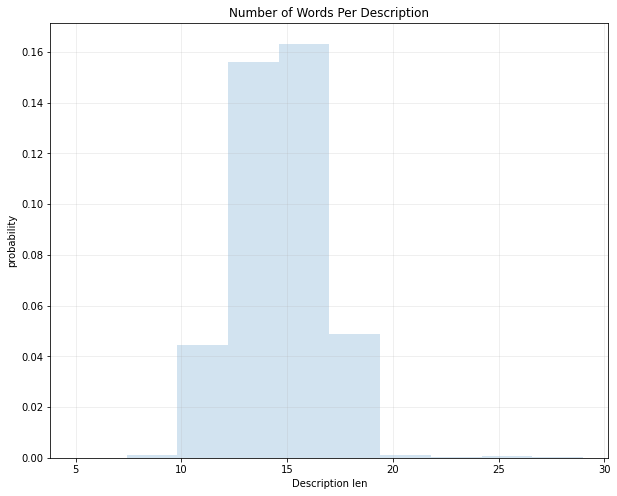

In [ ]:
phrase_len = X.apply(lambda p: len(p.split(' ')))
max_description_len = phrase_len.max()
print('max Description len: {0}'.format(max_description_len))
plt.figure(figsize = (10, 8))
plt.hist(phrase_len, alpha = 0.2, density = True)
plt.xlabel('Description len')
plt.ylabel('probability')
plt.title("Number of Words Per Description")
plt.grid(alpha = 0.25)

### Input Description Word Tokenization
Limit each description to only have 29 words

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10)
max_words = 20000

# filter: each character which will be filtered from the texts
# oov_token: for all words that are not present in the word index, because they were not present in the initial set of data
#           , this argument will give these words a special token so that the length of the sequence isn't lost. Without it
#           , all words that are not tokenized, will be erased from the seqence
tokenizer = Tokenizer(
    num_words = max_words,
    filters = '",.#$%&()*+-/:;<=>@[\]^_`{|}~',
#     oov_token= "OOV"
)

# The model evaluation will be closer to what will happen in a prdouction environment because we fit the tokenizer only on the 
# training set and not on the validation set. So this will not allow data leakage.
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

# Max length (number of words in a description). All descriptions shorter than max_description_len
# will be padded at the end with '0' 's and all descriptions longer will be truncated at the end.
max_description_len = 29

X_train = pad_sequences(X_train, maxlen = max_description_len, padding = 'post', truncating = 'post')
X_val = pad_sequences(X_val, maxlen = max_description_len, padding = 'post', truncating = 'post')


num_words = len(tokenizer.word_index) + 1
print("Number of words tokenized:", num_words)
print("Example of tokenization:")
print("Original text:",  tokenizer.sequences_to_texts([X_train[30]]))
print("Tokenized text:", X_train[30])



Number of words tokenized: 16559
Example of tokenization:
Original text: ['kath prepares wed fine meats purveyor kel daughter kim moves back home becoming disillusioned two month marriage brett']
Tokenized text: [8671 2036 1701 3310 8672 8673 8674   33 2534  213   41   20  351 2037
    8 2535   95 8675    0    0    0    0    0    0    0    0    0    0
    0]


In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(6741, 29) (6741, 13)
(750, 29) (750, 13)


### Pretrained Word Embeddings
pretrained word embeddings are the embeddings learned in one task that are used for solving another similar task. Glove word embeddings can be downloaded here: https://nlp.stanford.edu/projects/glove/ . These embeddings are trained on much larger datasets with millions of samples. Embeddings are basically a powerful way to associate a vector with a word, using dense word vectors. Pre-trained embeddings capture semantic and syntactic meanings of words and capture the connections between various words. The first layer of our neural network will be the embeddings layer, which we will feed it our tokenized sequences. 
- In this cell, we first parse the GloVe word-embeddings file. We build an index that maps words to their vecotr representation.
- We chose the smallest possible embeddings, 50 dimensional, because our dataset is small and of computational limitations
- Then we build an embedding matrix that will be load into the Embedding layer. Some words in our dataset sadly do not exist in the GloVe embeddings file, such as specific character names, so we randomly initialze values to the 50 dimensional vector for each word we do not find. 

In [ ]:
# a dictionary with every word (from glovefile) as the key and its "vectorization" as the value
embeddings_dictionary = dict()

glove_file = open('glove.6B.50d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()
print('Found %s word vectors.' % len(embeddings_dictionary))
# 
embedding_matrix = zeros((num_words, 50))
count_hit = 0
count_miss = 0
# For every word we cannot find in the glove file, We're going to give each it's 
# own unique random vector, which we can make trainable later
for word, index in tokenizer.word_index.items():
    if index < max_words:
        embedding_vector = embeddings_dictionary.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
            count_hit += 1
        else:
            embedding_matrix[index] = np.random.randn(50) # 
            count_miss += 1

Found 400000 word vectors.


About 95% of our input words will have pretrained embeddings for them. The other 5% will be randomly initialized and hopefully will learn their syntactic and semantic meaning through training

In [ ]:
print("% words from our dataset found in glove file:", float(count_hit) / float(count_hit + count_miss))
print("Number of words mising:", count_miss)

% words from our dataset found in glove file: 0.9659379152071507
Number of words mising: 564


## Model Definition

In [ ]:
def define_model(length, vocab_size):
    # channel 1
    inputs1 = Input(shape=(length,))
    embedding1 = Embedding(vocab_size, 50, weights=[embedding_matrix])(inputs1)

    x = SpatialDropout1D(0.5)(embedding1)
    x = Conv1D(filters=36, kernel_size=2, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(filters=36, kernel_size=2, activation='relu', padding='valid', strides=1)(x)
    # x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.5)(x)
    flat1 = Flatten()(x)

    # channel 2
    inputs2 = Input(shape=(length,))
    embedding2 = Embedding(vocab_size, 50, weights=[embedding_matrix])(inputs2)

    x = SpatialDropout1D(0.5)(embedding2)
    x = Conv1D(filters=36, kernel_size=6, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(filters=36, kernel_size=6, activation='relu', padding='valid', strides=1)(x)
    # x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.5)(x)
    flat2 = Flatten()(x)

    # channel 3
    inputs3 = Input(shape=(length,))
    embedding3 = Embedding(vocab_size, 50, weights=[embedding_matrix])(inputs3)

    x = SpatialDropout1D(0.5)(embedding3)
    x = Bidirectional(LSTM(32, dropout = .5, return_sequences=True))(x)
    # x = Dropout(.5)(x)
    flat3 = Flatten()(x)

    # merge
    merged = concatenate([flat1, flat2, flat3])
    # x = Dropout(0.5)(merged)

    # interpretation
    x = Dense(64, activation='relu')(merged)
    x = Dropout(0.4)(x)

    outputs = Dense(13, activation='sigmoid')(x)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # compile
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize
    print(model.summary())
    plot_model(model, show_shapes=True, to_file='multichannel.png')
    return model

model_lstm = define_model(29, num_words)


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 29)]         0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 29)]         0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 29, 50)       827950      input_13[0][0]                   
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 29, 50)       827950      input_14[0][0]                   
____________________________________________________________________________________________

## Model Training

In [ ]:
checkpoint_filepath = 'bestmodel'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model_lstm.fit(
    [X_train,X_train,X_train],
    y_train,
    validation_data = ([X_val,X_val,X_val], y_val),
    epochs = 30,
    batch_size = 64,
    callbacks = [model_checkpoint_callback]
)

Epoch 1/30
106/106 [==============================] - 13s 85ms/step - loss: 0.4404 - accuracy: 0.1725 - val_loss: 0.3190 - val_accuracy: 0.3240
Epoch 2/30
106/106 [==============================] - 8s 74ms/step - loss: 0.3238 - accuracy: 0.2702 - val_loss: 0.2800 - val_accuracy: 0.3680
Epoch 3/30
106/106 [==============================] - 8s 73ms/step - loss: 0.3035 - accuracy: 0.3059 - val_loss: 0.2601 - val_accuracy: 0.4053
Epoch 4/30
106/106 [==============================] - 8s 72ms/step - loss: 0.2866 - accuracy: 0.3606 - val_loss: 0.2500 - val_accuracy: 0.4640
Epoch 5/30
106/106 [==============================] - 8s 72ms/step - loss: 0.2729 - accuracy: 0.3985 - val_loss: 0.2369 - val_accuracy: 0.4600
Epoch 6/30
106/106 [==============================] - 8s 73ms/step - loss: 0.2695 - accuracy: 0.4115 - val_loss: 0.2321 - val_accuracy: 0.4720
Epoch 7/30
106/106 [==============================] - 8s 73ms/step - loss: 0.2579 - accuracy: 0.4337 - val_loss: 0.2317 - val_accuracy: 0.488

since we were using checkpoints during training, we will load in the model that got the best validation accuracy

In [ ]:
model_lstm.load_weights(checkpoint_filepath)

## Model Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


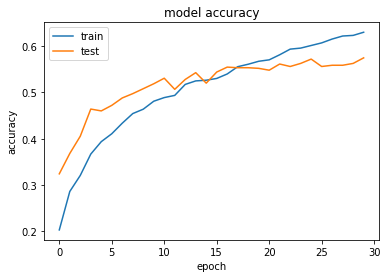

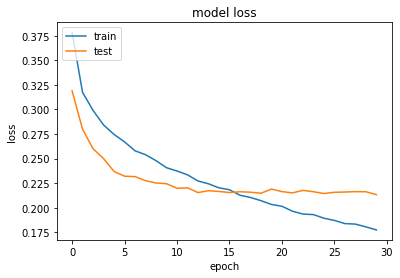

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The model began to overfit around 15 epochs, but luckly since we used checkpoints, we were able to load in our model from around 15 epochs.

This cell below 

In [ ]:
# Some of the predictions in that the model makes, end up being empty sets because
# none of the values in the output dense layer exceed the threshold. Therefore, 
# for those samples, we find the highest value output and set that
# as the prediction of the model.
def make_predictions(model_lstm, X_val, pred):
    pred_floats = model_lstm.predict([X_val,X_val, X_val])
    for i in range(len(pred)):
        if np.count_nonzero(pred[i]) == 0:
            pred[i] = to_categorical(np.argmax(pred_floats[i]), 13).astype("int32")
    return pred

# This function only takes one output genre per prediction. It takes
# the class that the model is most confident about and uses that as its only prediction
def make_single_predictions(model_lstm, X_val, pred):
    pred_floats = model_lstm.predict([X_val,X_val, X_val])
    for i in range(len(pred)):
        pred[i] = to_categorical(np.argmax(pred_floats[i]), 13).astype("int32")
    return pred

# This function evaluates our model inorder to give us the best threshold we can use
def eval_model(model_lstm, X_val, y_val):
    f1_scores = {}
    hamming_scores = {}
    for i in np.arange(.1, .9, .05):
        pred = (model_lstm.predict([X_val,X_val, X_val]) > i).astype("int32")
        pred = make_predictions(model_lstm, X_val, pred)
        at_least_one = np.max(np.bitwise_and(y_val, pred), axis = 1)
        acc = sum(at_least_one) / len(at_least_one)
        f1 = f1_score(y_val, pred, average = "micro")
        f1_scores[f1] = i
        hamming = hamming_loss(y_val, pred)
        hamming_scores[hamming] = i
        print("Threshold {}\n      One Right: {}, f1: {}, hamming loss: {}".format(i.round(2), acc.round(2), f1.round(3), hamming))
    max_f1 = max(f1_scores.keys())
    best_threshold = f1_scores[max_f1]
    print("\n\nMax F1 score (micro average acc), Threshold: {}, f1: {}".format(best_threshold.round(2),max_f1))
    return best_threshold
    # min_hamming = min(hamming_scores.keys())
    # best_threshold = hamming_scores[min_hamming]
    # print("Min Hamming loss, Threshold: {}, f1: {}".format(best_threshold.round(2),min_hamming))

Some of the predictions in that the model makes, end up being empty sets because none of the values in the output dense layer exceed the threshold. Therefore, for those samples, we find the highest value output and set that as the prediction of the model.

In [ ]:
best_threshold = eval_model(model_lstm, X_val, y_val)

Threshold 0.1
      One Right: 0.93, f1: 0.553, hamming loss: 0.1524102564102564
Threshold 0.15
      One Right: 0.91, f1: 0.582, hamming loss: 0.1284102564102564
Threshold 0.2
      One Right: 0.88, f1: 0.601, hamming loss: 0.11271794871794871
Threshold 0.25
      One Right: 0.86, f1: 0.613, hamming loss: 0.10246153846153847
Threshold 0.3
      One Right: 0.82, f1: 0.612, hamming loss: 0.09671794871794871
Threshold 0.35
      One Right: 0.78, f1: 0.604, hamming loss: 0.09261538461538461
Threshold 0.4
      One Right: 0.76, f1: 0.596, hamming loss: 0.09056410256410256
Threshold 0.45
      One Right: 0.74, f1: 0.591, hamming loss: 0.08707692307692308
Threshold 0.5
      One Right: 0.72, f1: 0.582, hamming loss: 0.08533333333333333
Threshold 0.55
      One Right: 0.71, f1: 0.575, hamming loss: 0.0838974358974359
Threshold 0.6
      One Right: 0.7, f1: 0.574, hamming loss: 0.08246153846153846
Threshold 0.65
      One Right: 0.69, f1: 0.573, hamming loss: 0.08153846153846153
Threshold 0.7


The best threshold to use for classifying samples into genres will be about .3. Therefore we will use this threshold as our best model predictor

In [ ]:
pred = (model_lstm.predict([X_val,X_val, X_val]) > best_threshold).astype("int32")
print("Final Model micro-averaging f1 score:", f1_score(y_val, pred, average = "micro"))


Final Model micro-averaging f1 score: 0.6131782945736435


Now we will have the model only predict ONE class per sample. Therfore, given a movie/tv show description, it will only output a SINGLE genre. Then we will calculate how often it correctly guesses a single genre out of the genre list per movie/tv show. Note, that movie/tv show can have 1-3 genres. This method for evaluation is therfore more realistic, because if you were to ask a human to tell you the genre of a movie, they would probably name one and not try to guess several for a single movie

In [ ]:
pred = make_single_predictions(model_lstm, X_val, pred)
at_least_one = np.max(np.bitwise_and(y_val, pred), axis = 1)
acc = sum(at_least_one) / len(at_least_one)
print("How often we are able to predict one genre correctly: {}%".format(100*acc.round(2)))

How often we are able to predict one genre correctly: 69.0%


This dataframe below shows the predicted genres compared to the actual genres of the sample. Here we are only predicting one genre per sample

In [ ]:
predictions = pd.DataFrame({"prediction": multilabel_binarizer.inverse_transform(pred), "actual": multilabel_binarizer.inverse_transform(y_val)})
predictions[:20]

,prediction,actual
0,"(childrens,)","(childrens, dramas)"
1,"(childrens,)","(childrens, comedies)"
2,"(dramas,)","(dramas,)"
3,"(comedies,)","(dramas, scifi and fantasy)"
4,"(documentaries,)","(documentaries,)"
5,"(dramas,)","(comedies,)"
6,"(documentaries,)","(reality,)"
7,"(childrens,)","(childrens,)"
8,"(childrens,)","(childrens,)"
9,"(dramas,)","(comedies, dramas)"


In [ ]:
correct_predictions = predictions[predictions["prediction"] == predictions["actual"]]

Lets look at an example of when our model correct predicts a samples genre. 

In [ ]:
print("Original text:",  tokenizer.sequences_to_texts([X_val[correct_predictions.index[10]]]))
correct_predictions.iloc[[10]]

Original text: ['size como friends examine wonder filled world around one time foods household goods']


,prediction,actual
32,"(childrens,)","(childrens,)"


# Words2Vec analysis

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7100 sha256=f17da528e7a9b1ed3810772463e87d2b50a841519af69745bb0b3a199ca63592
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


In [ ]:
import pandas as pd
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from adjustText import adjust_text

!pip install https://github.com/Phlya/adjustText/archive/master.zip

     | 3.0MB 2.0MB/s
  Created wheel for adjustText: filename=adjustText-0.8b2-cp37-none-any.whl size=9142 sha256=c2ecc0d5e75f95b283dc1c8018f4e8f0caec523c95f704a0325f55efd6f0d3b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-jq8by_ij/wheels/7a/56/aa/ee86b18565ad149ba3a5470b55bbc5081701fd0b57141ed055
Successfully built adjustText
  Found existing installation: adjustText 0.7.3
    Uninstalling adjustText-0.7.3:
      Successfully uninstalled adjustText-0.7.3


## Preprocessing

In [ ]:
# Grab all the titles descriptions
description = final_df['description']

# Create a list of strings, one for each description
description_list = [description for description in description]

# Collapse the list of strings into a single long string for processing
big_description_string = ' '.join(description_list)

In [ ]:
# Tokenize the string into words
tokens = word_tokenize(big_description_string)

# Remove non-alphabetic tokens, such as punctuation
words = [word.lower() for word in tokens if word.isalpha()]

# Filter out stopwords
stop_words = set(stopwords.words('english'))

words = [word for word in words if not word in stop_words]

# Print first 20 words
words[:20]

['future',
 'elite',
 'inhabit',
 'island',
 'paradise',
 'far',
 'crowded',
 'slums',
 'get',
 'one',
 'chance',
 'join',
 'saved',
 'squalor',
 'devastating',
 'earthquake',
 'hits',
 'mexico',
 'city',
 'trapped']

In [ ]:
len(words)

107732

In [ ]:
#count each occurence in list
from collections import Counter
count=Counter(words)
counts=count.most_common(100)
print(count)

Counter({'life': 705, 'young': 655, 'new': 603, 'family': 550, 'world': 476, 'man': 472, 'love': 440, 'two': 434, 'woman': 427, 'friends': 383, 'series': 356, 'must': 332, 'documentary': 324, 'find': 304, 'one': 301, 'school': 292, 'father': 281, 'finds': 273, 'help': 261, 'home': 260, 'three': 255, 'lives': 251, 'takes': 231, 'years': 227, 'group': 224, 'girl': 214, 'take': 203, 'save': 189, 'back': 188, 'high': 187, 'son': 185, 'special': 184, 'get': 183, 'city': 183, 'mother': 183, 'daughter': 182, 'team': 180, 'true': 179, 'teen': 178, 'four': 178, 'murder': 173, 'becomes': 173, 'past': 170, 'wife': 169, 'death': 167, 'women': 163, 'friend': 163, 'comedy': 162, 'war': 161, 'show': 160, 'town': 157, 'mysterious': 156, 'story': 155, 'gets': 154, 'boy': 151, 'best': 150, 'tries': 145, 'time': 142, 'secret': 141, 'student': 140, 'crime': 140, 'falls': 139, 'stories': 139, 'become': 138, 'way': 136, 'behind': 135, 'make': 134, 'follows': 133, 'film': 133, 'former': 131, 'first': 131, 'p

In [ ]:
#remove any duplicate words
res = []
[res.append(x) for x in words if x not in res]

print(res)

['future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slums', 'get', 'one', 'chance', 'join', 'saved', 'squalor', 'devastating', 'earthquake', 'hits', 'mexico', 'city', 'trapped', 'survivors', 'walks', 'life', 'wait', 'rescued', 'trying', 'desperately', 'stay', 'alive', 'army', 'recruit', 'found', 'dead', 'fellow', 'soldiers', 'forced', 'confront', 'terrifying', 'secret', 'haunting', 'jungle', 'training', 'camp', 'postapocalyptic', 'world', 'robots', 'hide', 'fear', 'dangerous', 'machines', 'exterminate', 'brave', 'newcomer', 'joins', 'group', 'brilliant', 'students', 'become', 'experts', 'intent', 'swindling', 'millions', 'las', 'vegas', 'casinos', 'playing', 'blackjack', 'genetics', 'professor', 'experiments', 'treatment', 'comatose', 'sister', 'blends', 'medical', 'shamanic', 'cures', 'unlocks', 'shocking', 'side', 'effect', 'awful', 'accident', 'couple', 'admitted', 'grisly', 'hospital', 'separated', 'must', 'find', 'escape', 'death', 'finds', 'high', 'school', 'a

In [ ]:
len(res)

17395

In [ ]:
# Load word2vec model (trained on Google collection)
model = gensim.models.KeyedVectors.load_word2vec_format('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz', binary = True) 

# Check dimension of word vectors
model.vector_size

300

In [ ]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model[word] for word in res if word in model.vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in res if word in model.vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
future,-0.080566,-0.012817,0.143555,0.051758,-0.062500,-0.042236,0.107422,-0.066895,0.200195,0.144531,-0.263672,0.124512,-0.048340,0.058594,-0.137695,-0.067871,-0.110352,0.271484,0.056885,0.001816,-0.105469,0.008240,-0.251953,0.160156,-0.081055,0.044434,0.029297,0.044922,-0.055664,0.030518,0.075684,-0.127930,-0.123047,0.029175,0.016235,0.065430,0.169922,-0.021606,-0.031250,-0.227539,...,-0.075684,0.022095,-0.043701,0.283203,0.061279,0.230469,-0.226562,-0.090820,-0.247070,-0.209961,0.196289,0.022949,0.116699,-0.001167,-0.141602,-0.012939,0.094238,-0.102051,-0.088379,0.002686,0.055664,0.117676,0.066895,0.148438,-0.060791,0.074707,0.106934,-0.197266,0.117676,0.078125,-0.216797,0.160156,-0.024902,-0.052246,0.063965,0.036133,-0.048340,0.046387,-0.026855,-0.165039
elite,-0.101562,0.162109,-0.010132,0.138672,-0.003067,-0.021606,-0.343750,-0.484375,-0.159180,-0.080078,0.123047,-0.123535,0.302734,0.038818,-0.039795,0.135742,0.017700,-0.023926,0.101074,0.042480,-0.037598,0.149414,-0.349609,-0.069824,0.156250,-0.168945,-0.328125,0.134766,-0.069336,0.013000,0.176758,-0.085449,0.353516,0.091797,0.287109,-0.059570,-0.058594,-0.112793,0.038086,0.077148,...,0.080566,-0.067871,-0.067871,0.310547,0.041748,0.146484,-0.143555,-0.214844,-0.242188,0.124023,-0.152344,0.241211,-0.279297,-0.062988,-0.118164,-0.040283,0.158203,-0.353516,0.008789,0.361328,0.078613,-0.181641,-0.038574,-0.049805,-0.187500,0.117676,-0.147461,0.242188,0.150391,-0.213867,0.067383,-0.183594,-0.335938,-0.088379,-0.174805,-0.138672,-0.030762,-0.060059,-0.037354,0.084961
inhabit,0.091797,-0.037598,-0.114258,-0.008545,-0.192383,0.100098,0.137695,-0.022583,0.057129,0.257812,-0.166016,0.084473,-0.105957,0.162109,-0.055664,-0.021240,-0.193359,0.324219,-0.037354,0.187500,-0.220703,-0.058105,-0.194336,0.077148,0.100098,0.082520,-0.021240,0.070312,-0.058594,-0.279297,-0.173828,0.184570,-0.259766,0.057373,-0.064453,-0.138672,0.040283,-0.143555,-0.090332,0.421875,...,-0.174805,-0.174805,0.092773,0.445312,0.020508,0.289062,0.086914,0.059570,-0.012329,0.033447,-0.343750,0.111328,-0.022827,0.192383,0.149414,-0.298828,-0.285156,-0.014832,-0.192383,-0.019775,0.043945,-0.174805,0.166992,0.062988,0.453125,-0.289062,-0.373047,-0.099121,-0.142578,0.037598,-0.281250,0.139648,-0.088379,0.022461,-0.135742,0.114746,0.257812,-0.150391,0.251953,-0.070801
island,0.037109,-0.056396,-0.126953,-0.055420,-0.025879,-0.050049,-0.161133,-0.202148,0.125977,0.231445,0.059570,-0.308594,0.046143,-0.181641,-0.019287,0.246094,-0.115234,0.201172,0.137695,0.341797,0.160156,-0.226562,0.229492,0.108887,0.257812,0.001617,-0.065918,0.089355,0.103516,0.033936,0.140625,-0.094238,-0.197266,0.185547,0.140625,-0.126953,-0.146484,-0.028931,0.077637,0.098145,...,0.088379,-0.009949,-0.081543,0.003555,-0.040527,-0.226562,-0.304688,-0.097168,-0.164062,-0.143555,-0.056641,0.000113,0.032715,0.151367,-0.054199,0.016357,-0.195312,-0.134766,-0.189453,0.033936,-0.238281,-0.118164,0.251953,-0.042480,0.166992,-0.232422,-0.484375,0.261719,-0.171875,0.117188,-0.147461,-0.000271,-0.283203,0.045410,0.124023,0.039307,-0.458984,-0.079590,0.326172,0.115723
paradise,0.103027,0.021851,0.033691,0.107422,0.163086,0.071777,-0.068848,-0.092773,-0.229492,0.185547,0.094238,-0.298828,-0.099121,-0.103027,-0.009033,-0.044678,0.166992,-0.071777,0.228516,0.054443,0.225586,0.200195,-0.247070,0.166992,0.067871,0.038086,-0.119141,0.217773,0.231445,-0.149414,0.071289,0.001083,-0.158203,0.218750,-0.224609,-0.173828,0.010620,-0.250000,0.267578,0.224609,...,-0.036865,-0.227539,-0.123047,0.464844,0.035645,-0.113281,-0.207031,0.018555,-0.097168,0.072266,0.002640,0.105957,0.253906,0.057861,-0.195312,0.231445,-0.365234,-0.189453,-0.224609,0.239258,0.083008,-0.085449,0.161133,-0.034912,0.096680,-0.125

In [ ]:
df.shape

(14976, 300)

## Dimensionality Reduction with t-SNE


In [ ]:
# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 15)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:400])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



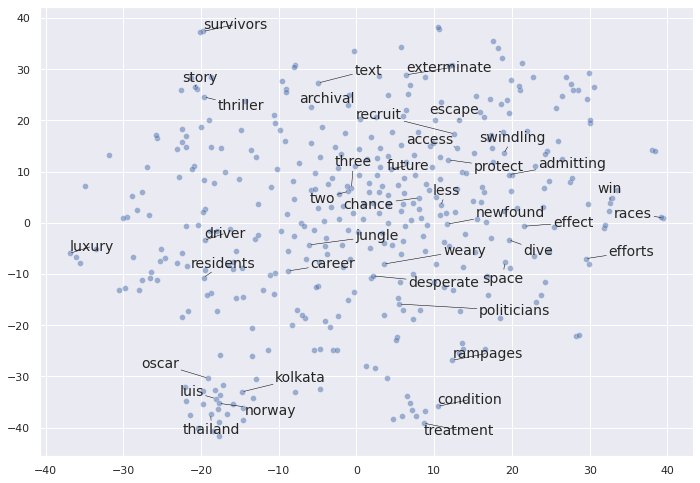

In [ ]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Initialize list of texts
texts = []
words_to_plot = list(np.arange(0, 400, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text 
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

In [ ]:
# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 15)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:5000])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



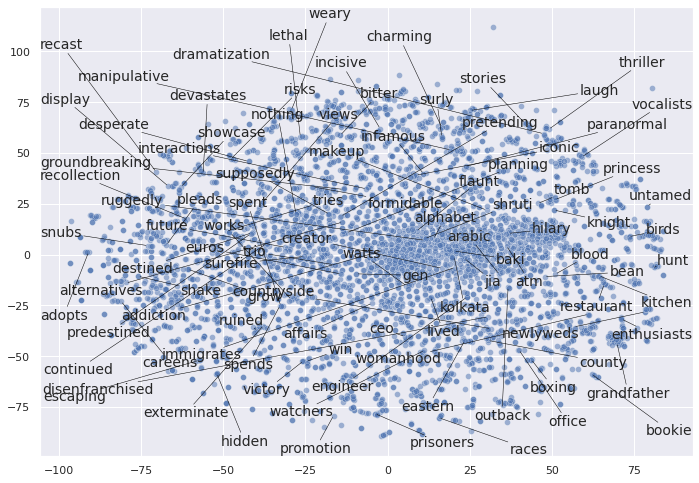

In [ ]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Initialize list of texts
texts = []
words_to_plot = list(np.arange(0, 5000, 50))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text 
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

## Averaging Word Embeddings

In [ ]:
# remove out-of-vocabulary words
def document_vector(word2vec_model, doc):
    doc = [word for word in doc if word in model.vocab]
    return np.mean(model[doc], axis=0)

# remain a description, dont separate 
def preprocess(text):
    text = text.lower()
    doc = word_tokenize(text)
    doc = [word for word in doc if word not in stop_words]
    doc = [word for word in doc if word.isalpha()] 
    return doc

# Function to check if at least one word of the descriptions is in the word2vec dictionary
def has_vector_representation(word2vec_model, doc):
    return not all(word not in word2vec_model.vocab for word in doc)

# Filter out descriptions
def filter_docs(corpus, texts, condition_on_doc):
    number_of_docs = len(corpus)

    if texts is not None:
        texts = [text for (text, doc) in zip(texts, corpus)
                 if condition_on_doc(doc)]

    corpus = [doc for doc in corpus if condition_on_doc(doc)]

    print("{} docs removed".format(number_of_docs - len(corpus)))

    return (corpus, texts)

In [ ]:
# Preprocess the corpus
corpus = [preprocess(description) for description in description_list]

# Remove descriptions that don't include any words in W2V's vocab
corpus, description_list = filter_docs(corpus, description_list, lambda doc: has_vector_representation(model, doc))

# Filter out any empty descriptions
corpus, description_list = filter_docs(corpus, description_list, lambda doc: (len(doc) != 0))
x = []
for doc in corpus: # append the vector for each document
    x.append(document_vector(model, doc))
    
X = np.array(x) 

0 docs removed
0 docs removed


## t-SNE on Descriptions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



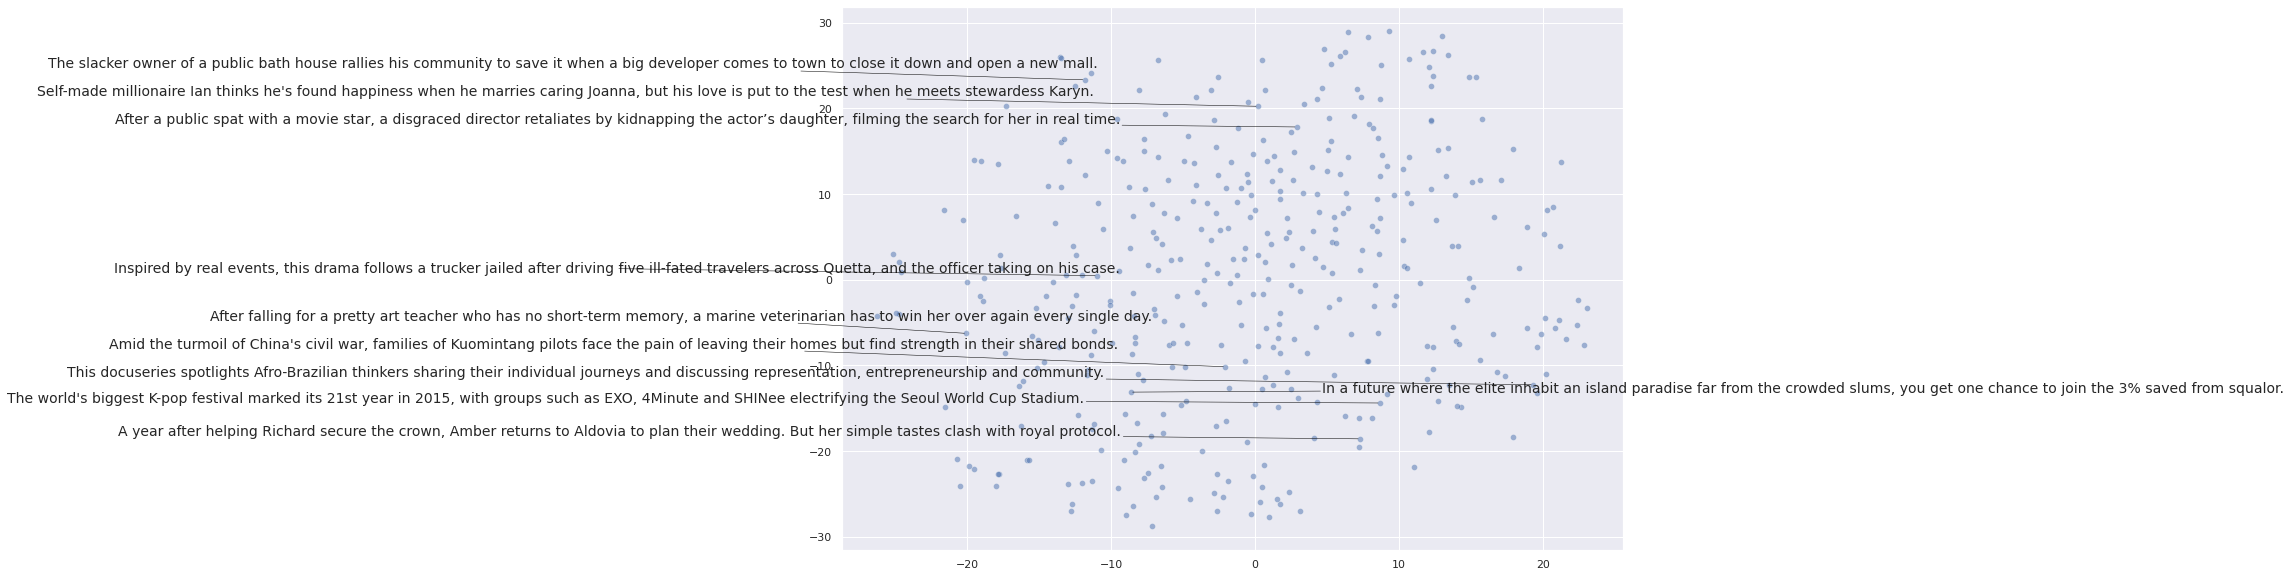

In [ ]:
# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 15)

# 400 rows
tsne_df = tsne.fit_transform(X[:400])
fig, ax = plt.subplots(figsize = (14, 10))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

texts = []
description_plot = list(np.arange(0, 400, 40)) 

# Append words to list
for description in description_plot:
    texts.append(plt.text(tsne_df[description, 0], tsne_df[description, 1], description_list[description], fontsize = 14))
    
# Plot text using adjust_text
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()